In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [2]:
Housing2 = pd.read_csv('Transformed_Housing_Data2.csv')
Housing2.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
Housing2['mean_sales'] = Housing2['Sale_Price'].mean()
Housing2['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [4]:
Housing2["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

In [5]:
gradewise_list = []
for i in range(1,11):
  k = Housing2["Sale_Price"][Housing2["Overall Grade"] == i]
  gradewise_list.append(k)

In [6]:
classwise_list = []
for i in range(1,11):
  k = Housing2["Sale_Price"][Housing2["Overall Grade"] == i]
  classwise_list.append(k)

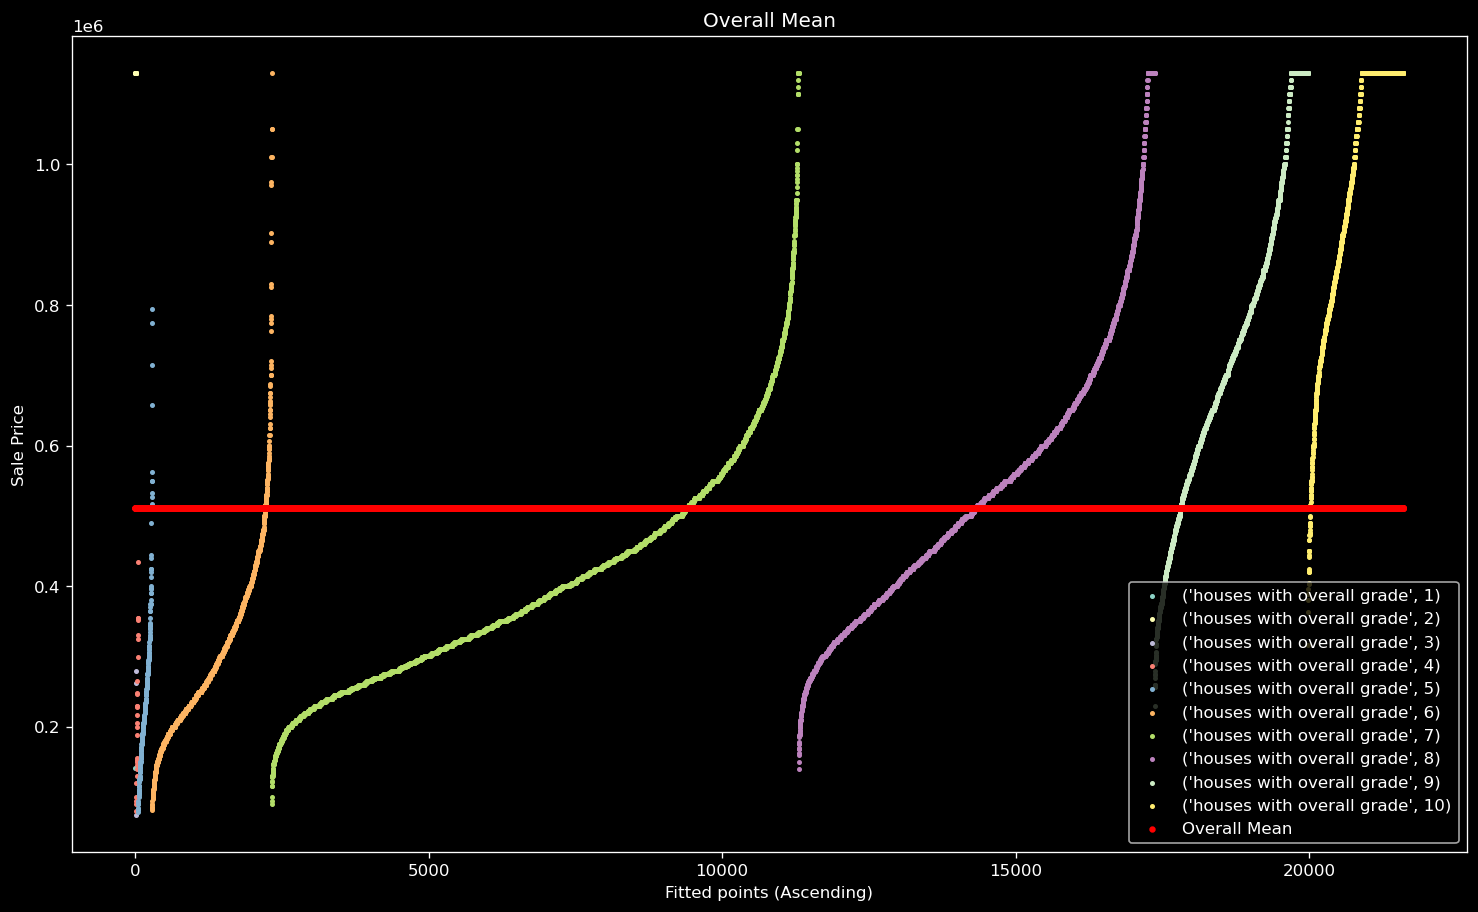

In [7]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # plotting
  plt.scatter( points, # x-axis
              np.sort(gradewise_list[i-1], axis = 0) , # y-axis
              label = ('houses with overall grade', i), s = 4 )            
  z = max(points) + 1 # updating z for next plot

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         Housing2['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 8)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend( loc = 4)

In [8]:
grades_mean = Housing2.pivot_table(values = 'Sale_Price' , columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [9]:
# making new column
Housing2['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
  Housing2['grade_mean'][Housing2['Overall Grade'] == i] = grades_mean[i][0]
  
Housing2['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

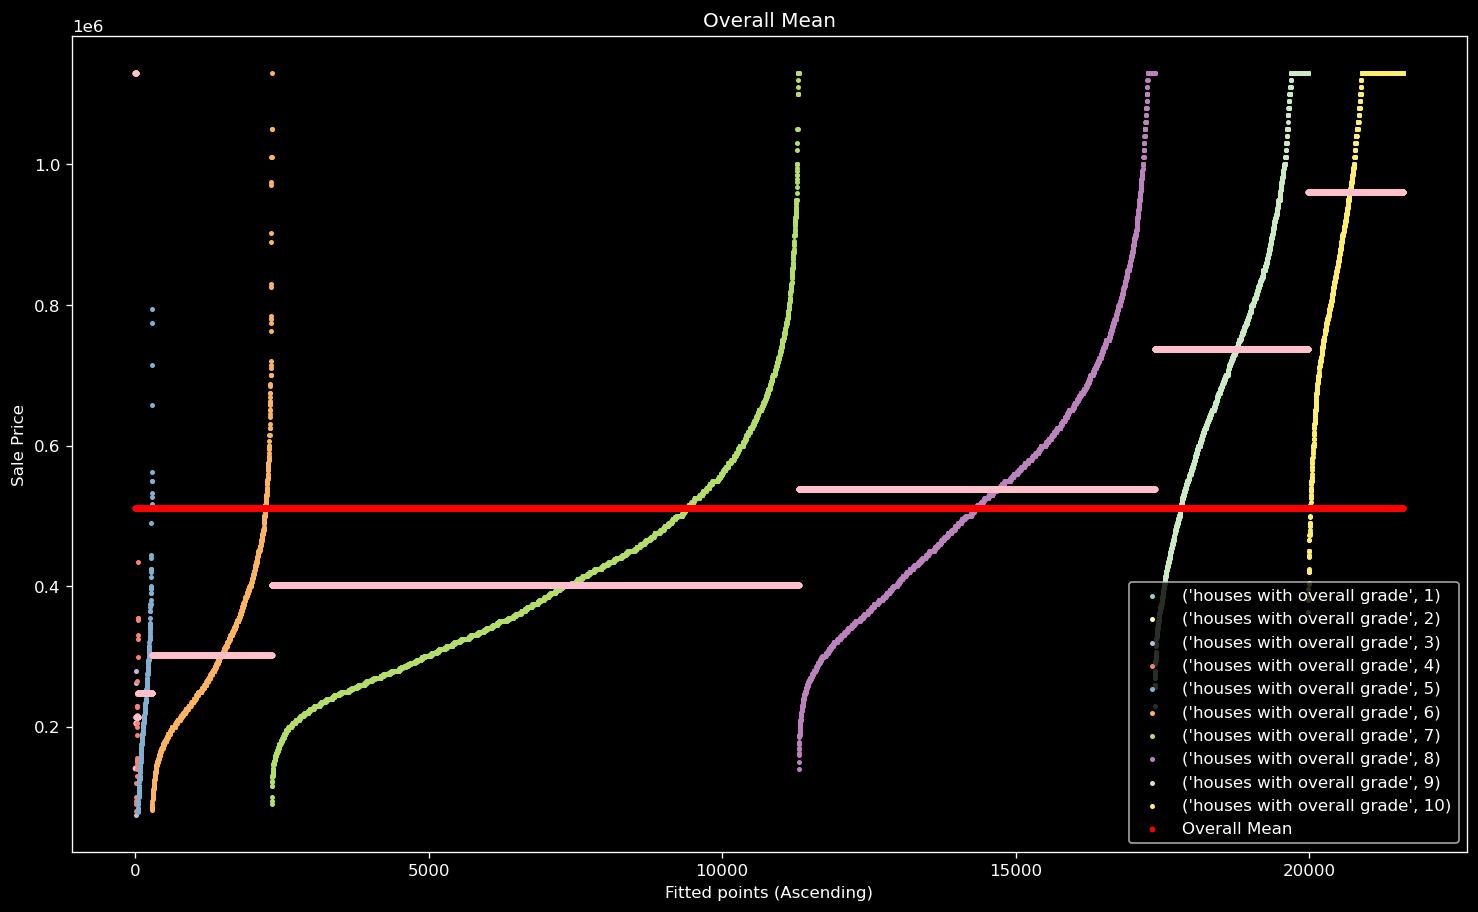

In [10]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # Plotting
  plt.scatter( points,
              gradewise_list[i-1].sort_values(),
              label = ('houses with overall grade', i), s = 4 )
  # Plotting gradewise mean
  plt.scatter( points,
              [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
              s = 6, color = 'pink'
              )          
  z = max(points) + 1

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         Housing2['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)

## Residual Plot

Residual = Prediction - Actual

In [11]:
# Model 1 -> prediction tenique is 'Sale_Price' of new home will be the mean of sales

In [12]:
# Model 2 -> we've plotted gradewise mean 'Sale_Price', so the prediction technique is the 'Sale_Price' of new home will be the mean 'Sale_Price' of the grade the new home belongs

In [13]:
mean_difference = Housing2['mean_sales'] - Housing2['Sale_Price']
grade_mean_difference = Housing2['grade_mean'] - Housing2['Sale_Price']

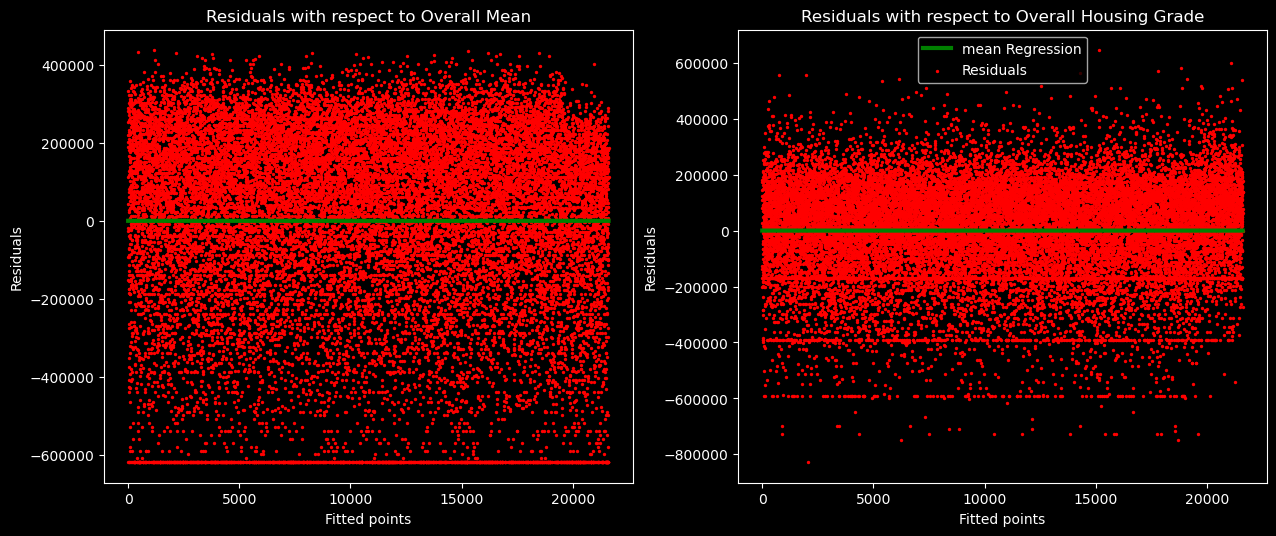

In [14]:
k = range(0, len(Housing2))
l = [0 for i in range(len(Housing2))]

plt.figure( figsize = (15,6), dpi =100)

plt.subplot(1,2,1)
plt.scatter( k , mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

## Evaluating the Models

In [15]:
# Calculating Mean Error

# mean_difference = mean - actual

In [16]:
mean_error = sum(mean_difference)/len(Housing2)
print(round(mean_error, 7))

0.0


### 1. Mean Absolute Error 

In [17]:
Y = Housing2["Sale_Price"]
Y_hat1 = Housing2["mean_sales"]
Y_hat2 = Housing2['grade_mean']
n = len(Housing2)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [18]:
mean_absolute_error1 = sum(abs(Y_hat1 - Y))/n
mean_absolute_error1

199168.78146839526

In [19]:
mean_absolute_error2 = sum(abs(Y_hat2 - Y))/n
mean_absolute_error2

137081.70298203363

In [20]:
# calculating MAE using scikit-learn library

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_2 = mean_absolute_error(Y_hat2, Y)
mean_absolute_error_2

137081.7029820291

### 2. Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error( Y_hat1, Y)
mse2 = mean_squared_error(Y_hat2, Y)
mse1, mse2

(62528116847.799576, 30804835720.342426)

### 3. Root Mean Squared Error

In [23]:
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error( Y_hat1, Y)**0.5
rmse2 = mean_squared_error(Y_hat2, Y)**0.5
rmse1, rmse2

(250056.2273725643, 175513.06424406826)

### 4. R^2

R2 = 1 - mse(predicted val of sales price)/mse(mean of sales price)

In [24]:
Y = Housing2["Sale_Price"]
Y_bar = Housing2["mean_sales"]
Y_hat = Housing2['grade_mean']
n = len(Housing2)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [25]:
mse_mean = mean_squared_error( Y_bar, Y)
mse_mean

62528116847.799576

In [26]:
mse_model = mean_squared_error( Y_hat, Y)
mse_model

30804835720.342426

In [27]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836

In [28]:
#calculating R2 using scikit-learn library

In [29]:
from sklearn.metrics import r2_score
score = r2_score(Y, Y_hat)
score

0.5073442592981836

In [30]:
from sklearn.metrics import mean_squared_error as mse

In [31]:
sale_price = Housing2["Sale_Price"].head(30)
flat_area = Housing2['Flat Area (in Sqft)'].head(30)
sample_Housing2 = pd.DataFrame({ 'sale_price': sale_price,
                              'flat_area': flat_area})
sample_Housing2

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


## Plotting th Housing2

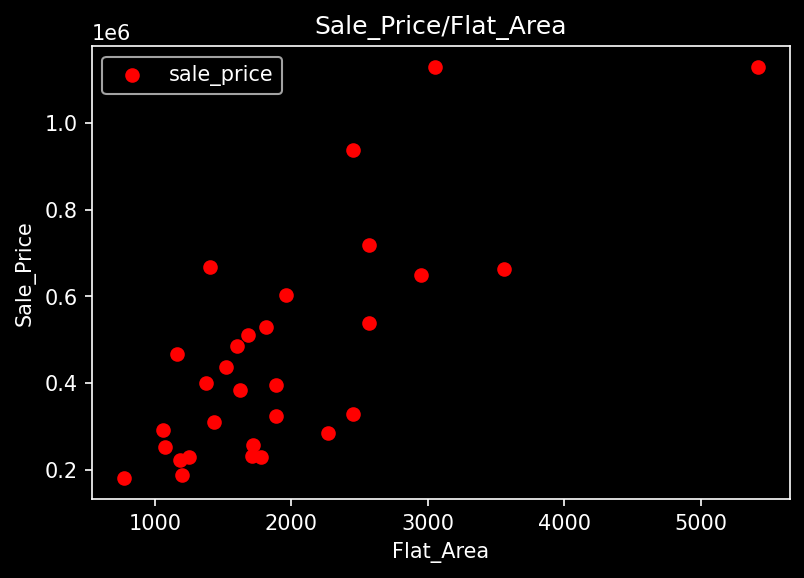

In [32]:
plt.figure( dpi = 150)
plt.scatter(sample_Housing2.flat_area, sample_Housing2.sale_price, color = 'red', label = 'sale_price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

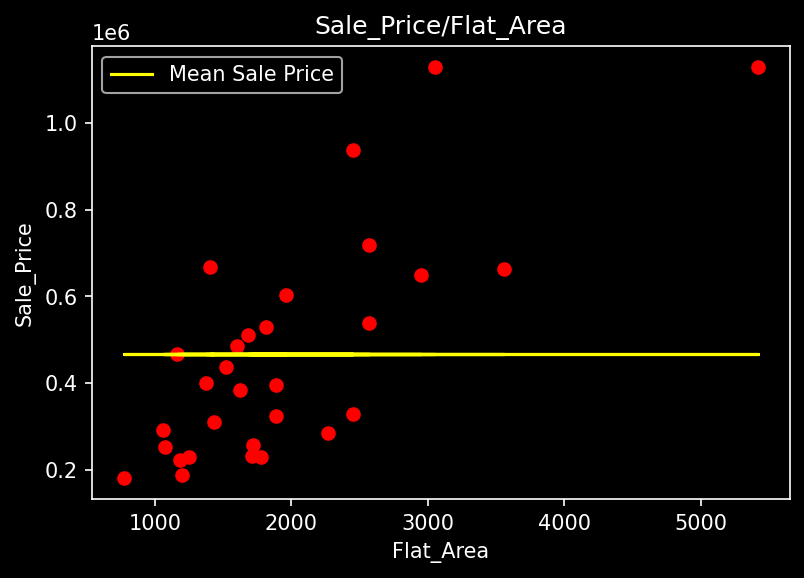

In [33]:
sample_Housing2['mean_sale_price'] = sample_Housing2.sale_price.mean()


plt.figure( dpi = 150)
plt.scatter(sample_Housing2.flat_area, sample_Housing2.sale_price, color = 'red')
plt.plot(sample_Housing2.flat_area, sample_Housing2.mean_sale_price, color = "yellow", label = 'Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

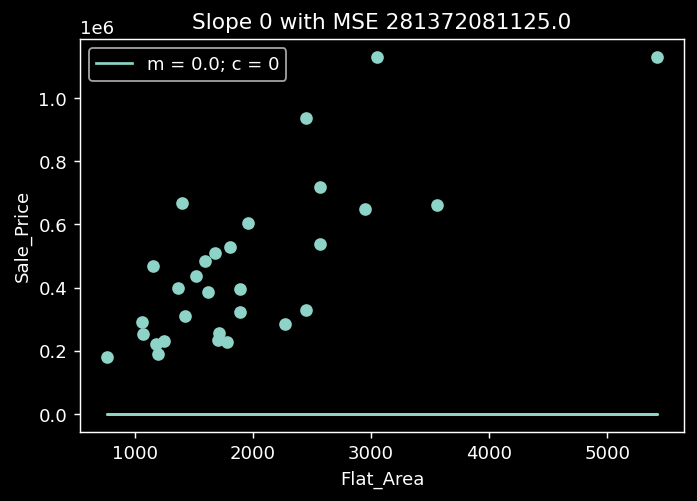

In [34]:
c = 0
m = 0

line = []

for i in range(len(sample_Housing2)):
    line.append(sample_Housing2.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_Housing2.flat_area, sample_Housing2.sale_price)
plt.plot(sample_Housing2.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_Housing2.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

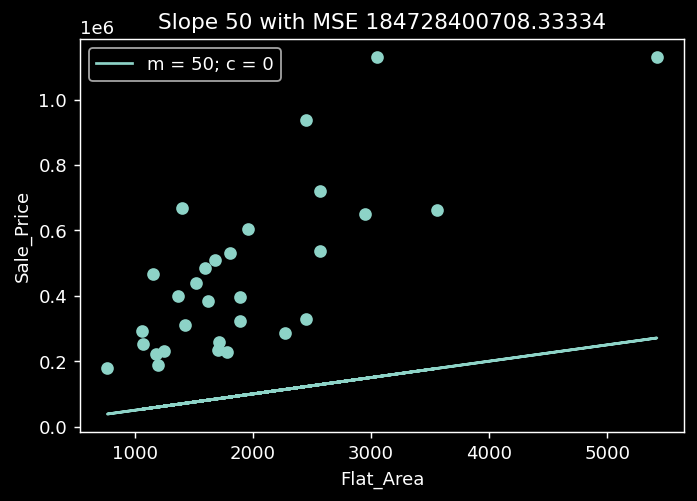

In [35]:
c = 0
m = 50

line = []

for i in range(len(sample_Housing2)):
    line.append(sample_Housing2.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_Housing2.flat_area, sample_Housing2.sale_price)
plt.plot(sample_Housing2.flat_area, line, label = 'm = 50; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_Housing2.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

In [36]:
def slope_Error( slope, intercept ,  sample_Housing2):
    sale = []
    for i in range(len(sample_Housing2.flat_area)):
        tmp = sample_Housing2.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_Housing2.sale_price, sale)
    return MSE

In [37]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 0, sample_Housing2 = sample_Housing2)
    Cost.append(cost)

In [38]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


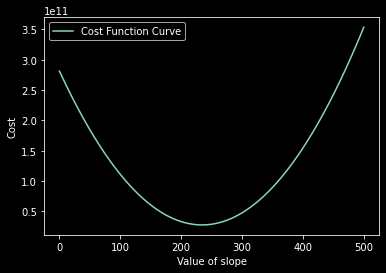

In [39]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [40]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

234.3

In [41]:
def intercept_Error( slope, intercept ,  sample_Housing2):
    sale = []
    for i in range(len(sample_Housing2.flat_area)):
        tmp = sample_Housing2.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_Housing2.sale_price, sale)
    return MSE

In [42]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 234, intercept = i, sample_Housing2 = sample_Housing2)
    Cost.append(cost)

In [43]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


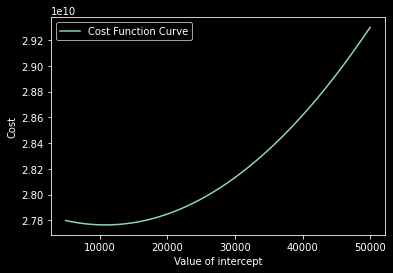

In [44]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [45]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

10834

In [46]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 10834, sample_Housing2 = sample_Housing2)
    Cost.append(cost)

In [47]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


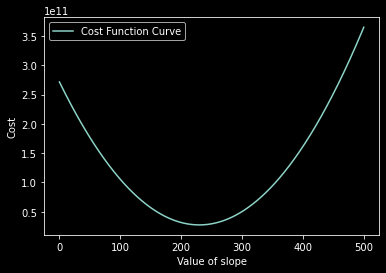

In [48]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [49]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

229.7

In [50]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 229.7, intercept = i, sample_Housing2 = sample_Housing2)
    Cost.append(cost)

In [51]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.781305e+10
1,5001,2.781302e+10
2,5002,2.781299e+10
3,5003,2.781296e+10
4,5004,2.781293e+10


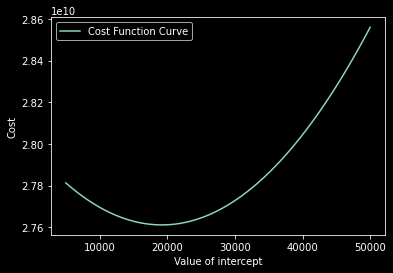

In [52]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [53]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

19199

### Gradient Descent Algorithm

In [54]:
sale_price = Housing2["Sale_Price"].head(30)
flat_area = Housing2['Flat Area (in Sqft)'].head(30)
sample_Housing2 = pd.DataFrame({ 'sale_price': sale_price,
                              'flat_area': flat_area})
sample_Housing2.head()

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0


In [55]:
def param_init(Y):
  '''
  Y = target variable
  returns initialized values of m and c
  '''
  m = 0.1
  c = Y.mean()
  return m, c

In [56]:
def generate_predictions(m, c, X):
  '''
  X = independent variable
  returns prediction generated by line with parameters m, c
  '''
  prediction = []
  for x in X:
    pred = (m * x) + c
    prediction.append(pred)
  return prediction

In [57]:
def compute_cost(prediction, Y):
  '''
  returns the mean_squared_error between prediction and Y
  '''
  cost = np.sum(((prediction - Y)**2)/len(Y))
  return cost

In [58]:
def gradients(prediction, Y, X):
  '''
  Returns Gradients corresponding to m and c
  '''
  n = len(Y)
  Gm = 2/n * np.sum((prediction - Y) * X)
  Gc = 2/n * np.sum((prediction - Y))
  return Gm, Gc

In [59]:
def param_update(m_old , c_old , Gm_old, Gc_old, alpha):
  '''
  Update and return the new values of m and c
  '''
  m_new = m_old - alpha * Gm_old
  c_new = c_old - alpha * Gc_old
  return m_new, c_new

In [60]:
def result(m, c, X, Y, cost, predictions, i):
  '''
  Print and plot the final result obtained from gradient descent
  '''
  ##If the Gradient Descent converged to the optimum value before max_iter
  if i < max_iter - 1 :
    print("***** Gradient Descent has converged at iteration {} *****".format(i))
  else:
    print("***** Result after", max_iter,'iterations is: *****')
  
  ## plotting the final result
  plt.figure(figsize = (14,7), dpi = 120)
  plt.scatter(X, Y, color = 'red', label = 'Housing2 points')
  label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
  plt.plot(X, predictions, color = 'green', label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend()

After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost = 64177937552.075005
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost = 2.7417231010181384e+208
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost = inf
After Iteration 60 : m = 2.9430538842431367e+304 ; c = 1.2398417341018387e+301 ; Cost = inf
After Iteration 80 : m = nan ; c = nan ; Cost = nan
After Iteration 100 : m = nan ; c = nan ; Cost = nan
After Iteration 120 : m = nan ; c = nan ; Cost = nan
After Iteration 140 : m = nan ; c = nan ; Cost = nan
After Iteration 160 : m = nan ; c = nan ; Cost = nan
After Iteration 180 : m = nan ; c = nan ; Cost = nan
After Iteration 200 : m = nan ; c = nan ; Cost = nan
After Iteration 220 : m = nan ; c = nan ; Cost = nan
After Iteration 240 : m = nan ; c = nan ; Cost = nan
After Iteration 260 : m = nan ; c = nan ; Cost = nan
After Iteration 280 : m = nan ; c = nan ; Cost = nan
After Iteration 300 : m = nan ;

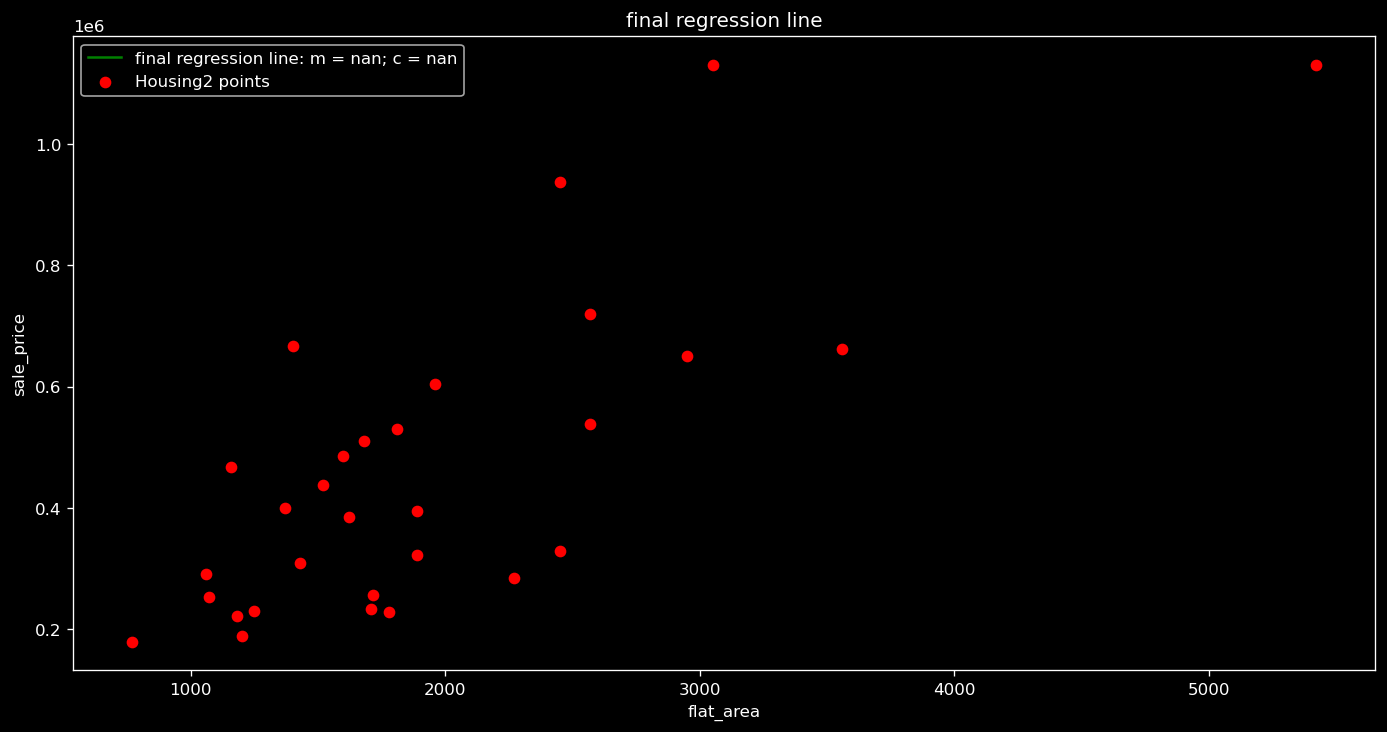

In [61]:
## defining and reshaping the Housing2set
sale_price = sample_Housing2['sale_price'].values.reshape(-1,1)
flat_area = sample_Housing2['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
After Iteration 100 : m = 0.6726323011945988 ; c = 1.611303683072644e-16 ; Cost = 0.4327923457067555
After Iteration 120 : m = 0.7010654163122192 ; c = 1.666074685620818e-16 ; Cost = 0.42856916078553225
After Iteration 140 : m = 0.7200475906265729 ; c = 1.6660746856208182e-16 ; Cost = 0.4266868855601835
After Iteration 160 : m = 0.7327202415200801 ; c = 1.669405354694694e-16 ; Cost = 0.42584795473189874
After Iteration 180 : m = 0.7411806042798547 ; c = 1.6694053546946945e-16 ; Cost = 0.425474

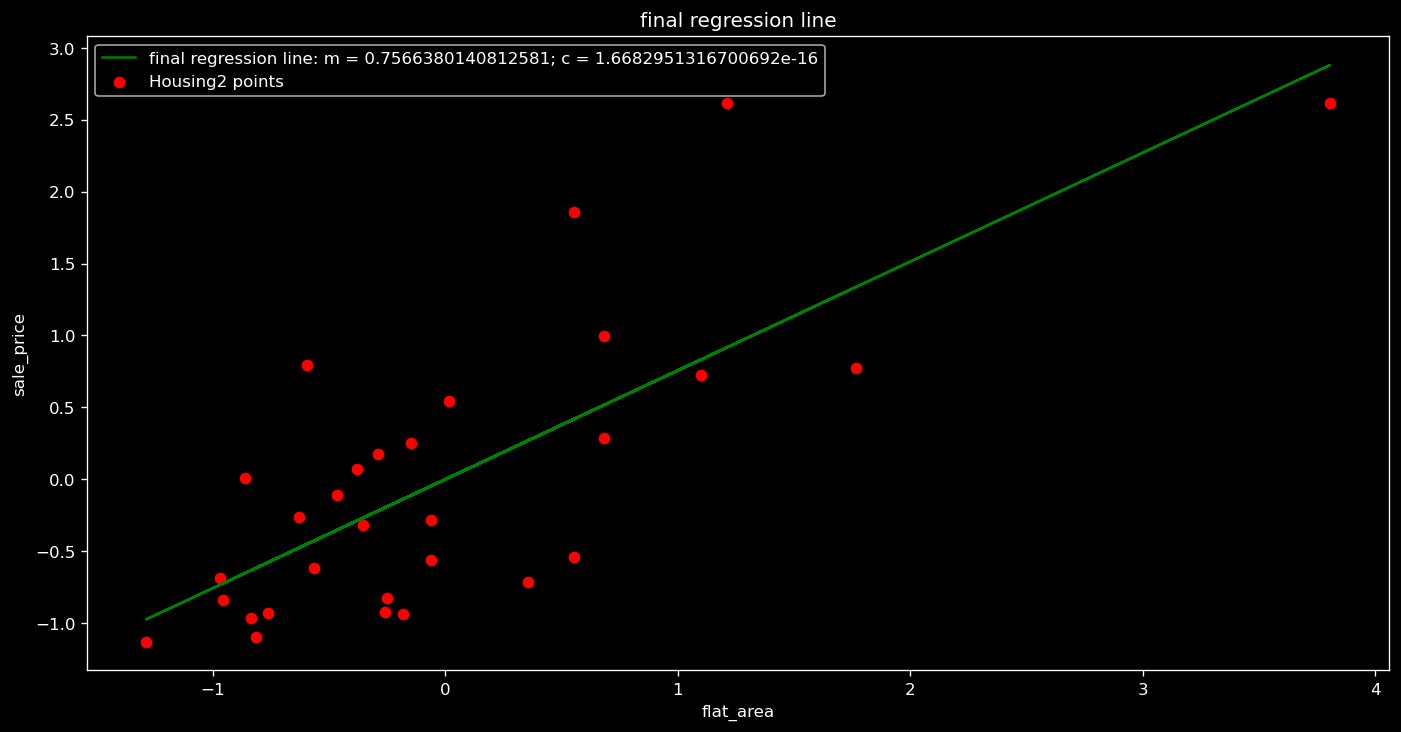

In [62]:
## scaling the Housing2set using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_Housing2['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_Housing2['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

# Overview
In this implementation, we will be looking at the following the steps as follows:

1.    Importing Libraries and Housing2set
2.    Scaling the Housing2set
3.    Checking Multicollinearity and removing it
4.    Creating test and training partitions
5.    Implementing the Linear Regression model
6.    Generating predictions over the test set
7.    Evaluating the model
8.    Preparing the Residual plot.
9.    Checking the Assumptions of Linear Regression.
10.   Visualising the Coefficient plot





## Importing libraries

In [63]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# plt.style.use('dark_background')
# import warnings
# warnings.filterwarnings(action = 'ignore')

In [64]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

In [65]:
# Housing2 = pd.read_csv('Transformed_Housing_Data2.csv')
# Housing2.head()

## Scaling the Dataset

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = Housing2['Sale_Price']
X = scaler.fit_transform(Housing2.drop(columns = ['Sale_Price']))
X = pd.DataFrame(X, columns = Housing2.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,-0.614108
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,-0.614108
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,-1.177565
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,-0.614108
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0,0.145783


## Checking and Removing Multicollinearity

In [67]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales,grade_mean
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,NaN,0.336276
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,NaN,0.638131
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253,NaN,0.751262
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,NaN,0.120503
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,NaN,0.449453
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,NaN,0.251620
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,NaN,0.955963
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398,NaN,0.753757
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,NaN,0.148740
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492,NaN,-0.423689


In [68]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['No of Bathrooms', 'grade_mean'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'grade_mean'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Over

### Calculating VIF

In [69]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_Housing2 = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_Housing2.values, i) for i in range(vif_Housing2.shape[1])], index = vif_Housing2.columns)
VIF

No of Bedrooms                                  1.700187
No of Bathrooms                                 3.375782
Flat Area (in Sqft)                          1482.038878
Lot Area (in Sqft)                              2.108170
No of Floors                                    2.129338
No of Times Visited                             1.438889
Overall Grade                                  13.055456
Area of the House from Basement (in Sqft)    1205.601277
Basement Area (in Sqft)                       345.481515
Age of House (in Years)                         2.634330
Latitude                                        2.471466
Longitude                                       1.675510
Living Area after Renovation (in Sqft)          3.085535
Lot Area after Renovation (in Sqft)             2.144405
Years Since Renovation                          2.788693
Condition_of_the_House_Excellent               53.694364
Condition_of_the_House_Fair                   166.436535
Condition_of_the_House_Good    

In [70]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [71]:
def MC_remover(Housing2):
  vif = pd.Series([variance_inflation_factor(Housing2.values, i) for i in range(Housing2.shape[1])], index = Housing2.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    Housing2 = Housing2.drop(columns = [vif[vif == vif.max()].index[0]])
    return Housing2
  else:
    print('No Multicollinearity present anymore')
    return Housing2

In [72]:
for i in range(7):
  vif_Housing2 = MC_remover(vif_Housing2)

vif_Housing2.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
grade_mean has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,mean_sales
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.0


### Remaining Columns

In [73]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_Housing2.values, i) for i in range(vif_Housing2.shape[1])], index = vif_Housing2.columns)
VIF, len(vif_Housing2.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

## Train/Test set

In [74]:
X = vif_Housing2
Y = Housing2['Sale_Price']

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 29), (6483, 29), (15126,), (6483,))

## Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [77]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051,
            0.        ])

In [78]:
predictions = lr.predict(x_test)

In [79]:
lr.score(x_test, y_test)

0.8461987715586199

### 1. Residuals

In [80]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [81]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

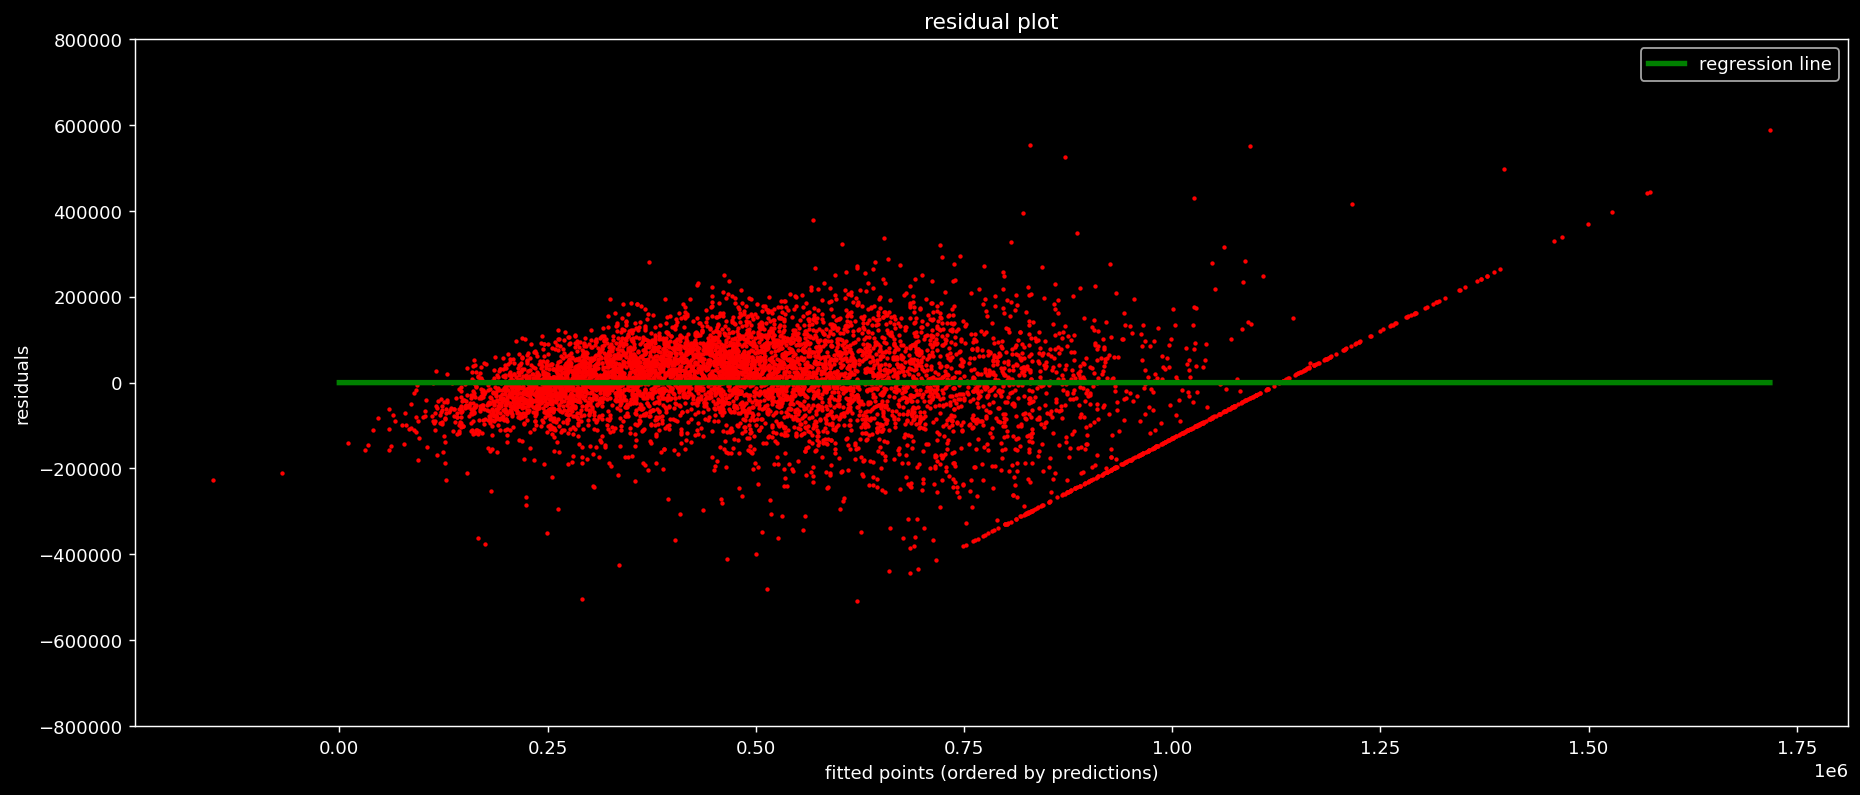

In [82]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## 2. Distribution of errors

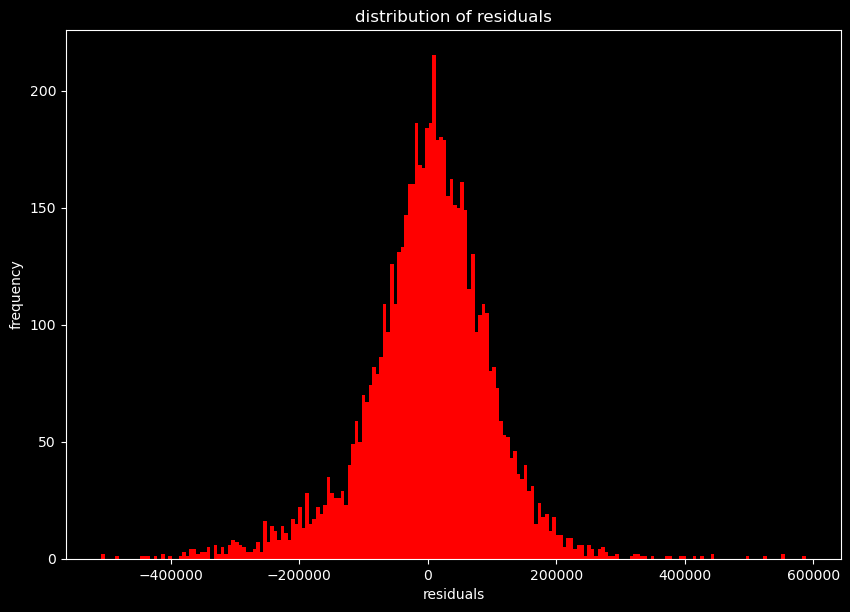

In [83]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients

In [84]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


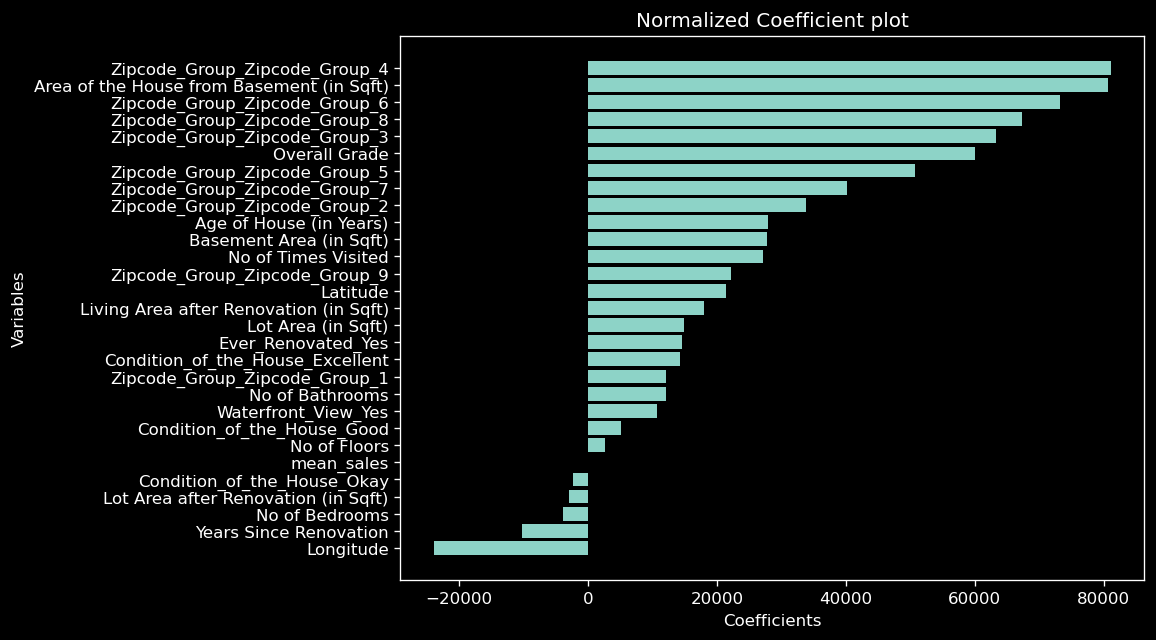

In [85]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()